# Artificial and Computational Intelligence Assignment 2 - Part B

List only the BITS (Name) of active contributors in this assignment:
1. 2020sc04050@wilp.bits-pilani.ac.in 
2. 2020sc04198@wilp.bits-pilani.ac.in
3. 2020sc04042@wilp.bits-pilani.ac.in
4. 2020sc04368@wilp.bits-pilani.ac.in


Dataset Length:  306
Dataset Shape:  (306, 4)
Dataset:     Age  Op_Year  axil_nodes  Surv_status
0   30       64           1            1
1   30       62           3            1
2   30       65           0            1
3   31       59           2            1
4   31       65           4            1
************************ TREE REPRESENTATION STARTS HERE **************************
|--- axil_nodes <= 4.50
|   |--- axil_nodes <= 0.50
|   |   |--- Age <= 49.50
|   |   |   |--- class: 1
|   |   |--- Age >  49.50
|   |   |   |--- class: 1
|   |--- axil_nodes >  0.50
|   |   |--- Age <= 60.50
|   |   |   |--- class: 1
|   |   |--- Age >  60.50
|   |   |   |--- class: 2
|--- axil_nodes >  4.50
|   |--- Age <= 37.50
|   |   |--- class: 1
|   |--- Age >  37.50
|   |   |--- OP_Year <= 65.50
|   |   |   |--- class: 2
|   |   |--- OP_Year >  65.50
|   |   |   |--- class: 1

************************ TREE REPRESENTATION ENDS HERE **************************
Results Using Gini Index:
Predicted value

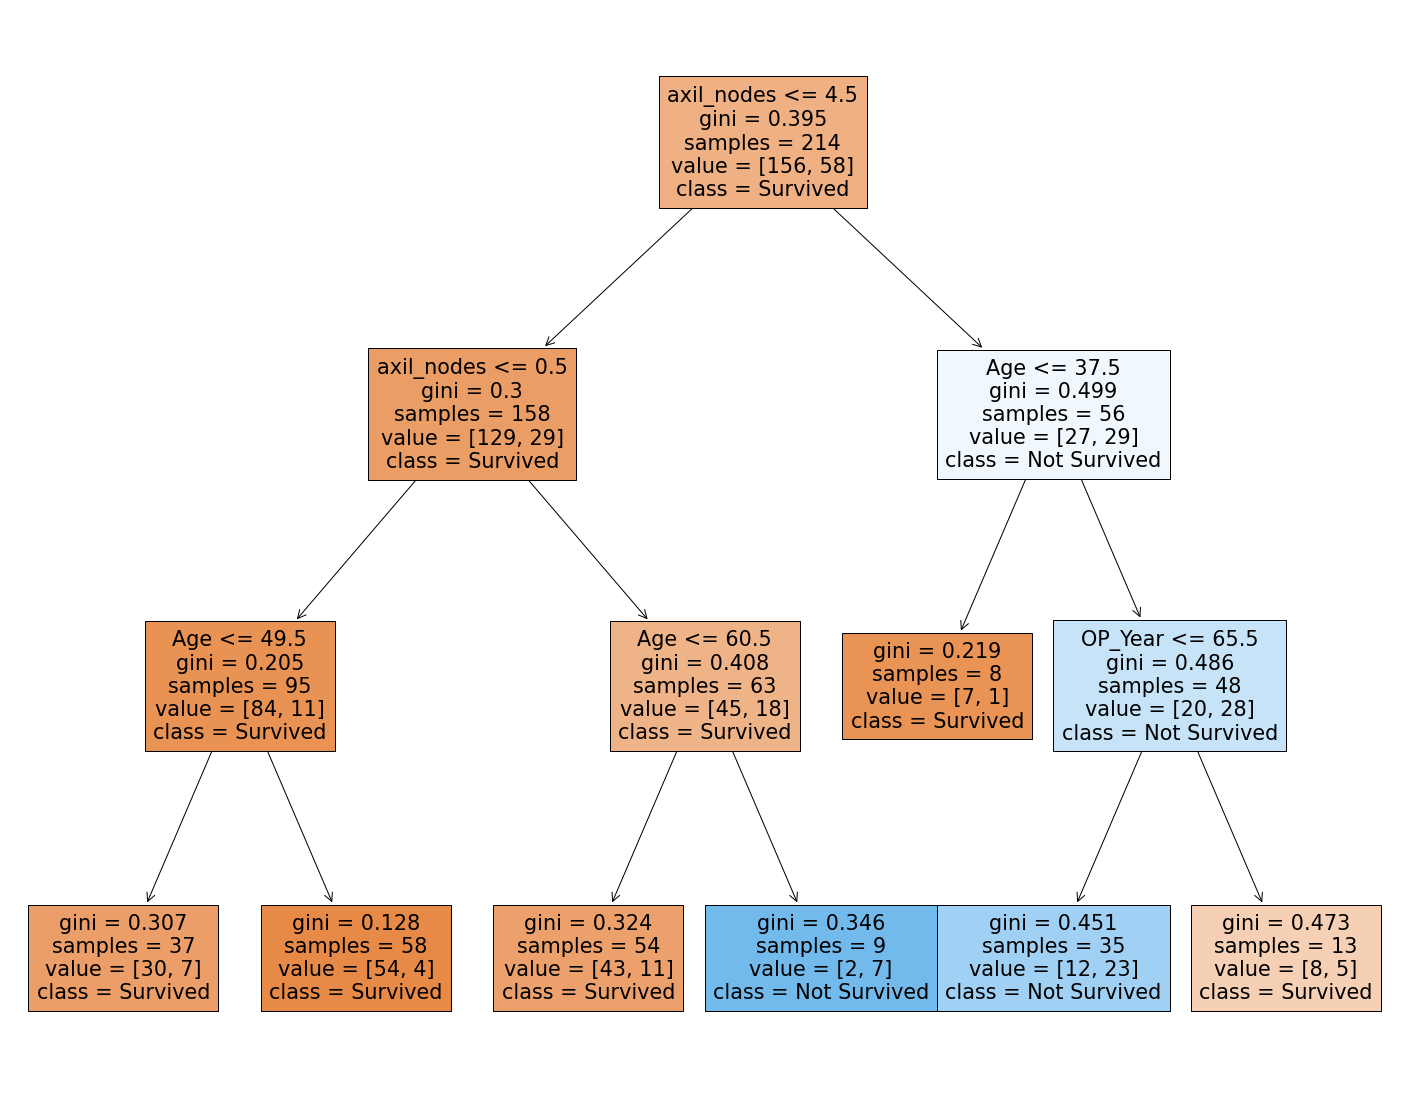

In [2]:
# Run this program on your local python
# interpreter, provided you have installed
# the required libraries.
  
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt

# Function importing Dataset
def importdata():
    #balance_data = pd.read_csv('balance-scale.data',sep= ',', header = None)
    balance_data = pd.read_excel('Habermans cancer Survival.xlsx')
    # Printing the dataswet shape
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
      
    # Printing the dataset obseravtions
    print ("Dataset: ",balance_data.head())
    return balance_data
  
# Function to split the dataset
def splitdataset(balance_data):
  
    # Separating the target variable
    X = balance_data.values[:, 0:3]
    Y = balance_data.values[:, -1]
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test
      
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train, data):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100, max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    
    text_representation = tree.export_text(clf_gini, feature_names=["Age","OP_Year","axil_nodes"])
    print("************************ TREE REPRESENTATION STARTS HERE **************************")
    print(text_representation)
    
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(clf_gini, 
                       feature_names=["Age","OP_Year","axil_nodes"],  
                       class_names=["Survived","Not Survived"],
                       filled=True)
    
    print("************************ TREE REPRESENTATION ENDS HERE **************************")
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 4, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
  
# Driver code
def main():
      
    # Building Phase
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train, data)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()
